In [1]:
import numpy as np
import pandas as pd
import spacy
import re
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
from wordcloud import WordCloud, STOPWORDS
import math
from scipy.stats import chi2_contingency, chisquare, chi2
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [2]:
trump_df = pd.read_csv('trump_tweet_senti.csv', lineterminator='\n')

In [3]:
trump_df

,created_at,tweet,likes,retweet_count,source,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,lang,Polarity,Subjectivity,Sentiment\r
0,2020-10-15 00:00:02,"['trump', 'student', 'used', 'hear', 'years', ...",2.0,1.0,Twitter Web App,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,ENGLISH,0.333333,0.333333,1.0
1,2020-10-15 00:00:02,"['2', 'hours', 'since', 'last', 'tweet', 'trum...",0.0,0.0,Trumpytweeter,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.066667,0.222222,1.0
2,2020-10-15 00:00:08,"['get', 'tie', 'get', 'tie', 'trump', 'rally',...",4.0,3.0,Twitter for iPhone,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,ENGLISH,0.000000,0.000000,0.0
3,2020-10-15 00:00:17,"['15', 'minutes', 'long', 'time', 'ago', 'omar...",2.0,0.0,Twitter for Android,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,ENGLISH,-0.108333,0.416667,-1.0
4,2020-10-15 00:00:17,"['glad', 'u', 'got', 'house', 'dicktrump', '20...",0.0,0.0,Twitter for iPhone,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.500000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673202,2020-11-08 23:59:38,"['stop', 'laying', 'paris', 'london', 'dont', ...",0.0,0.0,Twitter for iPhone,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,ENGLISH,-0.400000,0.600000,-1.0
673203,2020-11-08 23:59:42,"['earlier', 'week', 'got', 'rid', 'trump', 'to...",7.0,0.0,Twitter Web App,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,-0.033333,0.666667,-1.0
673204,2020-11-08 23:59:48,"['joe', 'biden', 'joe', 'biden', 'winned', 'tr...",4.0,0.0,Twitter Web App,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,-0.150000,0.650000,-1.0
673205,2020-11-08 23:59:54,"['first', 'would', 'need', 'compare', 'previou...",0.0,0.0,Twitter for iPad,1079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH,0.130556,0.233333,1.0


In [4]:
reviews1 = trump_df[trump_df['Polarity'] == 0.0000]
reviews1.shape

(277706, 18)

neutral statements are of size 277706.which is quite large, we will drop them all

In [5]:
cond1=trump_df['Polarity'].isin(reviews1['Polarity'])
trump_df.drop(trump_df[cond1].index, inplace = True)
trump_df.shape

(395501, 18)

In [6]:
X = trump_df["tweet"]
Y = trump_df["Sentiment\r"]

In [7]:
vectorizer = TfidfVectorizer()
X_tfid = vectorizer.fit_transform(X)

In [8]:
X_tfid_train, X_tfid_test, Y_tfid_train, Y_tfid_test = train_test_split(X_tfid, Y, test_size=0.33)

In [9]:
params = {'alpha': [0.01, 0.1, 0.3, 0.5, 1.0, 10.0],}
nb = MultinomialNB()
with tf.device('/GPU:0'):
    #logist=LogisticRegression()
    nb_cv=GridSearchCV(nb,param_grid=params,cv=5)
    nb_cv.fit(X_tfid_train,Y_tfid_train)

    print("tuned hpyerparameters :(best parameters) ",nb_cv.best_params_)
    print("accuracy :",nb_cv.best_score_)
    y_nb_pred = nb_cv.predict(X_tfid_test)
    print(classification_report(Y_tfid_test, y_nb_pred))

tuned hpyerparameters :(best parameters)  {'alpha': 0.1}
accuracy : 0.8213747947997057
              precision    recall  f1-score   support

        -1.0       0.84      0.68      0.75     50637
         1.0       0.82      0.92      0.86     79879

    accuracy                           0.82    130516
   macro avg       0.83      0.80      0.81    130516
weighted avg       0.83      0.82      0.82    130516



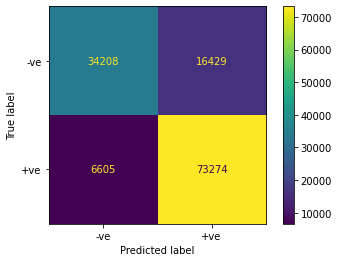

In [10]:
test_matrix = metrics.confusion_matrix(Y_tfid_test, y_nb_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=test_matrix, display_labels=["-ve","+ve"])
disp1.plot() 

In [11]:
with tf.device('/GPU:0'):
    Y_pred = nb_cv.predict(X_tfid)
    print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      0.76      0.83    153851
         1.0       0.86      0.95      0.91    241650

    accuracy                           0.88    395501
   macro avg       0.89      0.86      0.87    395501
weighted avg       0.88      0.88      0.88    395501



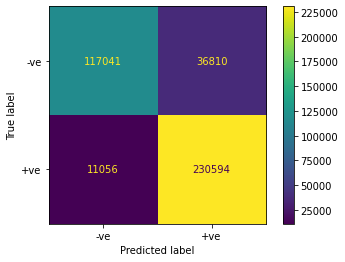

In [12]:
pred_matrix = metrics.confusion_matrix(Y, Y_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=pred_matrix, display_labels=["-ve","+ve"])
disp2.plot() 